In [1]:
# In This notebook we will consider an example of some data about US states and their populations and perform EDA (Exploratory data analysis)

import pandas as pd
import numpy as np

In [75]:
areas=pd.read_csv('C:/Users/Admin/Desktop/data/state-areas.csv')
pop=pd.read_csv('C:/Users/Admin/Desktop/data/state-population.csv')
abbrevs=pd.read_csv('C:/Users/Admin/Desktop/data/state-abbrevs.csv')

In [76]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [77]:
abbrevs.shape

(51, 2)

In [78]:
abbrevs=abbrevs.append({'state':'Puerto Rico','abbreviation':'PR'},ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16884\3254658286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  abbrevs=abbrevs.append({'state':'Puerto Rico','abbreviation':'PR'},ignore_index=True)


In [79]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [80]:
pop.shape

(2544, 4)

In [81]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [82]:
areas.shape

(52, 2)

In [83]:
pop['state/region'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'USA'],
      dtype=object)

In [84]:
pop.columns

Index(['state/region', 'ages', 'year', 'population'], dtype='object')

In [85]:
abbrevs.columns

Index(['state', 'abbreviation'], dtype='object')

In [86]:
# Task 1 - To rank US states and territories by 2010 population density 

merged=pd.merge(pop,abbrevs,how='outer',left_on='state/region',right_on='abbreviation')
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [87]:
merged.drop('abbreviation',axis=1,inplace=True)

In [88]:
# now we verify whether there are any mismatches which we can check by looking for records with null values

merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           48
dtype: int64

In [89]:
# how do we pick out those records which contain missing values

merged[merged['population'].isnull()]

# Insight- It appears that all the population values are from PR prior to the year 2000 ; this is likely due to this data not being available 
# from the original source 

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,Puerto Rico
2449,PR,total,1990,NaN,Puerto Rico
2450,PR,total,1991,NaN,Puerto Rico
2451,PR,under18,1991,NaN,Puerto Rico
2452,PR,total,1993,NaN,Puerto Rico
2453,PR,under18,1993,NaN,Puerto Rico
2454,PR,under18,1992,NaN,Puerto Rico
2455,PR,total,1992,NaN,Puerto Rico
2456,PR,under18,1994,NaN,Puerto Rico
2457,PR,total,1994,NaN,Puerto Rico


In [90]:
# we also observe that some of the new state entries are also null which means that there was no corresponding entry in the abbrevs column

merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['USA'], dtype=object)

In [91]:
merged.loc[merged['state/region']=='USA','state']='United States'

In [92]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [93]:
# now lets merge this dataframe with the area dataframe 

final=pd.merge(merged,areas,on='state',how='left')
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [94]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [95]:
final['state'][final['area (sq. mi)'].isnull()].unique()

# finding out the state mapped to the area which contain the null values 

array(['United States'], dtype=object)

In [96]:
final.columns

Index(['state/region', 'ages', 'year', 'population', 'state', 'area (sq. mi)'], dtype='object')

In [97]:
#  we understand that areas df does not contain the area of united states as a whole 

# Handling the missing value for United states area 

# sum of unique state areas 

x=final['area (sq. mi)'].unique().tolist()[:-1]
final['area (sq. mi)'].fillna(sum(x),inplace=True)



In [98]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)    False
dtype: bool

In [99]:
data2010=final.query("year==2010 & ages =='total' ")
# selecting the portion of data corresponding to the year 2010 and its total population

In [100]:
data2010

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0
283,CO,total,2010,5048196.0,Colorado,104100.0
293,CT,total,2010,3579210.0,Connecticut,5544.0
379,DE,total,2010,899711.0,Delaware,1954.0
389,DC,total,2010,605125.0,District of Columbia,68.0
475,FL,total,2010,18846054.0,Florida,65758.0


In [101]:
data2010.set_index('state',inplace=True)

In [102]:
data2010

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0
Colorado,CO,total,2010,5048196.0,104100.0
Connecticut,CT,total,2010,3579210.0,5544.0
Delaware,DE,total,2010,899711.0,1954.0
District of Columbia,DC,total,2010,605125.0,68.0


In [103]:
data2010['population_density']=data2010['population']/data2010['area (sq. mi)']

C:\Users\Admin\AppData\Local\Temp\ipykernel_16884\3199991710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2010['population_density']=data2010['population']/data2010['area (sq. mi)']


In [104]:
data2010.sort_values('population_density',ascending=False)

# Inference: Based on the insight, DC is the densest region while alaska is the least densest region 

,state/region,ages,year,population,area (sq. mi),population_density
state,,,,,,
District of Columbia,DC,total,2010,605125.0,68.0,8898.897059
Puerto Rico,PR,total,2010,3721208.0,3515.0,1058.665149
New Jersey,NJ,total,2010,8802707.0,8722.0,1009.253268
Rhode Island,RI,total,2010,1052669.0,1545.0,681.339159
Connecticut,CT,total,2010,3579210.0,5544.0,645.600649
Massachusetts,MA,total,2010,6563263.0,10555.0,621.815538
Maryland,MD,total,2010,5787193.0,12407.0,466.445797
Delaware,DE,total,2010,899711.0,1954.0,460.445752
New York,NY,total,2010,19398228.0,54475.0,356.094135


In [111]:
# state with the most number of minors i.e less than 18 years old in 2012 

final.query("year==2012 & ages=='under18'").sort_values(['population'],ascending=False)

,state/region,ages,year,population,state,area (sq. mi)
2542,USA,under18,2012,73708179.0,United States,3790399.0
192,CA,under18,2012,9209007.0,California,163707.0
2110,TX,under18,2012,6985807.0,Texas,268601.0
1537,NY,under18,2012,4264694.0,New York,54475.0
478,FL,under18,2012,4012421.0,Florida,65758.0
670,IL,under18,2012,3057042.0,Illinois,57918.0
1825,PA,under18,2012,2737905.0,Pennsylvania,46058.0
1726,OH,under18,2012,2668125.0,Ohio,44828.0
481,GA,under18,2012,2487831.0,Georgia,59441.0
1630,NC,under18,2012,2284122.0,North Carolina,53821.0


In [112]:
# Example 2 dataset 

df=pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

# This dataset contains the number of births grouped by date and gender

In [113]:
df.shape

(15547, 5)

In [114]:
df.head()


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [115]:
df.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [117]:
df['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [119]:
# lets create a new column containing respective decade

df['decade']=10*(df['year']//10)

In [120]:
df

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [121]:
df['decade'].unique()

array([1960, 1970, 1980, 1990, 2000], dtype=int64)

Text(0, 0.5, 'total births per decade')

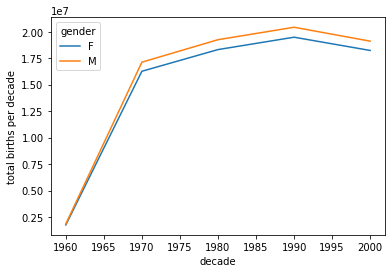

In [124]:
# finding out sum of male and female births across the decades

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

df.pivot_table(values='births',index='decade',columns='gender',aggfunc='sum')

Text(0, 0.5, 'total births per decade')

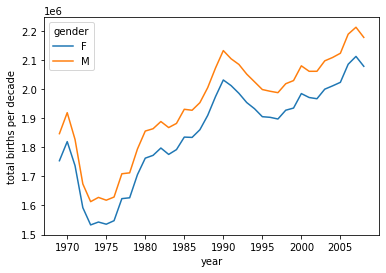

In [125]:
df.pivot_table(values='births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per decade')

In [127]:
# furthur data exploration

df.isnull().any()

year      False
month     False
day        True
gender    False
births    False
decade    False
dtype: bool

In [128]:
df['day'].isnull().sum()

480

In [130]:
# technique to handle the missing values by splitting the data into quartiles and computing based on IQR

quartiles=np.percentile(df['births'],[25,50,75])

In [142]:
x=quartiles[0]
y=(quartiles[2]-quartiles[0]) # iqr =3-1 
z=quartiles[2]

In [143]:
births=df.query("(births>@x-1.5*@y)&(births<@z+1.5*@y)")
# this syntax will query the dataset to filter rows with births outside these values

In [145]:
births.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

In [146]:
births.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
decade      int64
dtype: object

In [148]:
births['day']=births['day'].astype(int)  

# converting float to int type 

C:\Users\Admin\AppData\Local\Temp\ipykernel_16884\4128209244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day']=births['day'].astype(int)


In [149]:
births.index=pd.to_datetime(10000*births['year']+100*births['month']+births['day'],format='%Y%m%d')
# creating new set of values as index based on 3 columns ( year,month and day into datetime object ) 

births['dayofweek']=births.index.dayofweek 
# helps to identify the day of week from the datetime object 




C:\Users\Admin\AppData\Local\Temp\ipykernel_16884\1539313244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek']=births.index.dayofweek


In [153]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


C:\Users\Admin\AppData\Local\Temp\ipykernel_16884\1715845415.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']) # get current axis means it will create the axis if there is no axis yet


Text(0, 0.5, 'mean births by day')

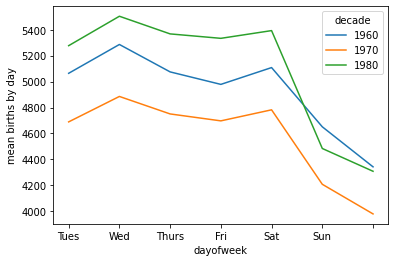

In [154]:
# Lets plot the births by weekday for several decades

births.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']) # get current axis means it will create the axis if there is no axis yet
plt.ylabel('mean births by day')

# Apparently births are slightly less common on weekends than on weekday 

In [155]:
# Another plot to view the mean number of births by the day of the year - To do this we need to group month and day seperately

births_by_date=births.pivot_table('births',[births.index.month,births.index.day])
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [157]:
# the above result is a multi index over months and days.So we will turn these months and days into a date by associating them with a dummy variable

births_by_date.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

C:\Users\Admin\AppData\Local\Temp\ipykernel_16884\1816606834.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]


In [159]:
births_by_date

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


<AxesSubplot:>

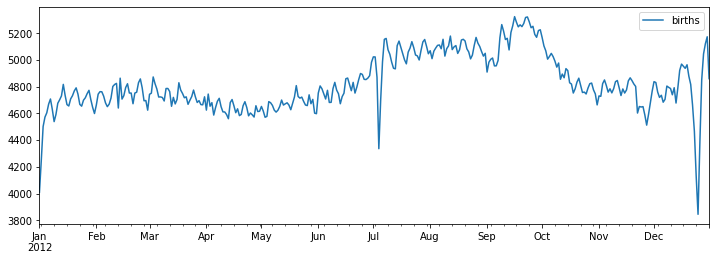

In [163]:
fig,ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# Conclusion: The plot depicts the average daily births by date.
# And also higher number of births bw Sept-Oct 